In [1]:
import numpy as np
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt
import cftime
import dask
import os
import statsmodels.api as sm
%matplotlib inline

In [2]:
f='/glade/campaign/asp/djk2120/PPEn11/amflx/PPEn11_CTL2010SP_US-Mpj-beta3_LHC0000.clm2.h1.2008-01-01-00000.nc'

In [57]:
ds = xr.open_dataset(f)
nt = len(ds.time)
ix = np.arange(nt)<nt-1 #first timestep is not meaningful
ds = ds.shift(time=-1).isel(time=ix,lndgrid=0)

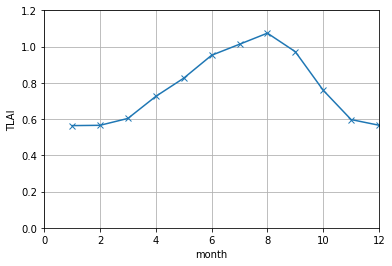

In [99]:
ds.TLAI.groupby('time.month').mean().plot.line('-x')
plt.grid()
plt.xlim([0,12])
plt.ylim([0,1.2]);

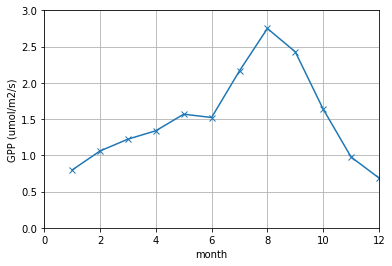

In [101]:
ds.FPSN.groupby('time.month').mean().plot.line('-x')
plt.grid()
plt.ylabel('GPP (umol/m2/s)')
plt.xlim([0,12])
plt.ylim([0,3]);

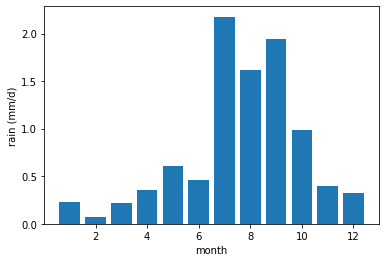

In [59]:
r=(24*60*60*ds.RAIN).groupby('time.month').mean().compute()
plt.bar(1+np.arange(12),r)
plt.xlabel('month')
plt.ylabel('rain (mm/d)');

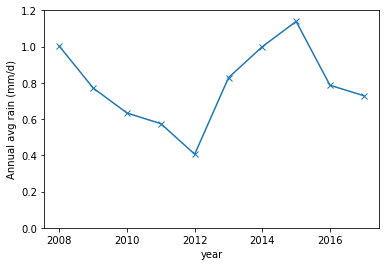

In [102]:
r=(24*60*60*ds.RAIN).groupby('time.year').mean().plot.line('-x')
plt.ylabel('Annual avg rain (mm/d)')
plt.ylim([0,1.2]);

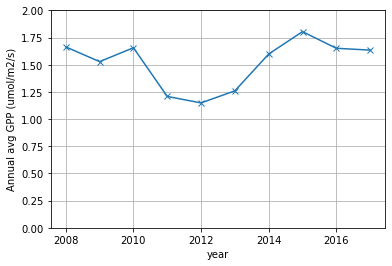

In [103]:
ds.FPSN.groupby('time.year').mean().plot.line('-x')
plt.ylabel('Annual avg GPP (umol/m2/s)')
plt.ylim([0,2])
plt.grid()

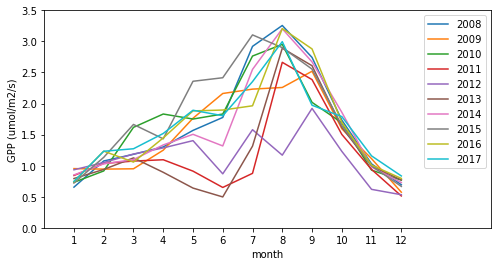

In [104]:
g=ds['time.year']*100+ds['time.month']
gpp_monthly = ds.FPSN.groupby(g).mean().compute()

plt.figure(figsize=[8,4])
plt.plot(1+np.arange(12),gpp_monthly.values.reshape([10,12]).T)
plt.xlim([0,15])
plt.ylim([0,3.5])

plt.xticks(1+np.arange(12))
plt.xlabel('month')
plt.ylabel('GPP (umol/m2/s)')
yrs = np.unique(ds['time.year'])
plt.legend(yrs,);

In [69]:
tc = ds.TSA-273.15
esat = 0.61094*np.exp(17.625*tc/(tc+243.04))
rh   = ds.RH2M/100
vpd  = ((1-rh)*esat).compute()
ds['VPD']=vpd

In [133]:
ix = (ds['time.month']>=7)&(ds['time.month']<=9)
g=(ds['time.year']*1000+ds['time.dayofyear'])[ix]

vs=['SOILWATER_10CM','VPD','FSDS','FPSN','EFLX_LH_TOT','time.dayofyear','time.year','RAIN','TSA']
daily={v:ds[v].isel(time=ix).groupby(g).mean().compute() for v in vs}


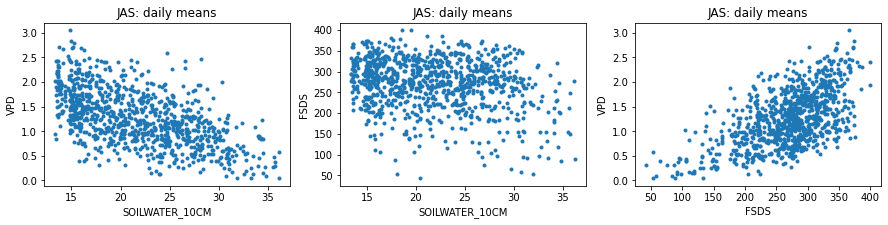

In [112]:
plt.figure(figsize=[15,3])
pairs=[('SOILWATER_10CM','VPD'),
       ('SOILWATER_10CM','FSDS'),
       ('FSDS','VPD')]

for i,pair in enumerate(pairs):
    v1,v2=pair
    plt.subplot(1,3,i+1)
    plt.plot(daily[v1],daily[v2],'.')
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title('JAS: daily means');

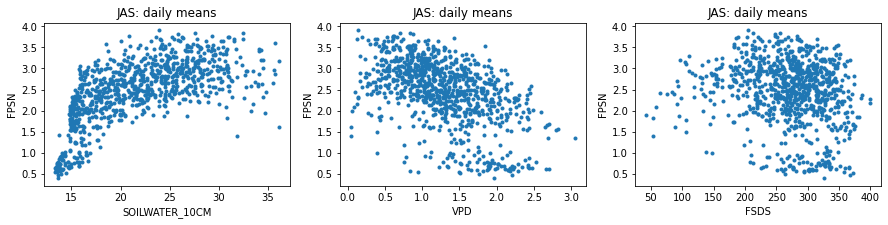

In [113]:
plt.figure(figsize=[15,3])
v1s = ['SOILWATER_10CM','VPD','FSDS']
v2  = 'FPSN'
for i,v1 in enumerate(v1s):
    plt.subplot(1,3,i+1)
    plt.plot(daily[v1],daily[v2],'.')
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title('JAS: daily means');
    

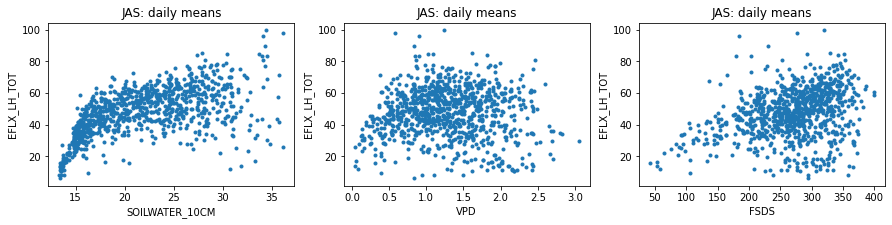

In [114]:
plt.figure(figsize=[15,3])
v1s = ['SOILWATER_10CM','VPD','FSDS']
v2  = 'EFLX_LH_TOT'
for i,v1 in enumerate(v1s):
    plt.subplot(1,3,i+1)
    plt.plot(daily[v1],daily[v2],'.')
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title('JAS: daily means');

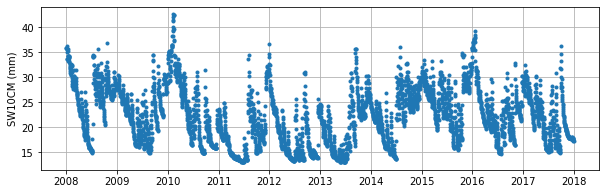

In [159]:
g=ds['time.year']*365+ds['time.dayofyear']
t=2008+np.arange(3650)/365
plt.figure(figsize=[10,3])
x=ds.SOILWATER_10CM.groupby(g).mean().compute()
plt.plot(t,x,'.')
plt.xticks(2008+np.arange(11))
plt.ylabel('SW10CM (mm)')
plt.grid();